# Advanced Regression Assigment - Surprise Housing

# 1. Introduction

## 1.1 Business Background

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia.

## 1.2 Problem Statement

The company is looking at prospective properties to buy to enter the market.
You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.
The company wants to know:
Which variables are significant in predicting the price of a house, and
How well those variables describe the price of a house.
Also, determine the optimal value of lambda for ridge and lasso regression.

## 1.3 Objective of the Project

You are required to model the price of houses with the available independent variables.
This model will then be used by the management to understand how exactly the prices vary with the variables.
They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns.
Further, the model will be a good way for management to understand the pricing dynamics of a new market.

## 1.4 Approach to solve this business problem

    1 : Data Understanding and Exploratory Data Analysis ( EDA )

    2 : Data Preperation

    3 : Building the model

    4 : Model Prediction and Evaluation

    5 : Redge and Lasso Regularization Comparison

    6 : Conclusion

In [40]:
# Pre-requistie- Importing required packages

import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
import datetime

from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

# 2. Data understanding and EDA

In [41]:
# Reading csv data

data = pd.read_csv('train.csv')
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [42]:
# Shape of the data

data.shape

(1460, 81)

## Inferences from the data:
    * There are a total of 1460 records and 81 columns in the current dataset
    * Some fields contains NaN values impling some details about the field like NaN for Fence implies "No Fence"


In [43]:
# Checking the percentage of null values (non zero) in differend columns

col_list = list(data)
null = []
for i in data.isnull().sum()*100/data.shape[0]:
    null.append(i)
data = {'columns': col_list, '% null': null}
data_null = pd.DataFrame(data)
data_null[data_null['% null'] != 0]

,columns,% null
3,LotFrontage,17.739726
6,Alley,93.767123
25,MasVnrType,0.547945
26,MasVnrArea,0.547945
30,BsmtQual,2.534247
31,BsmtCond,2.534247
32,BsmtExposure,2.602740
33,BsmtFinType1,2.534247
35,BsmtFinType2,2.602740
42,Electrical,0.068493


### Inferences:

Below columns are having "NaN" values, but according to the data defination they have some meaning like:

Alley: NaN = No alley access,

BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2: NaN = No Basement,

FireplaceQu: NaN = No fire place,

GarageType, GarageFinish, GarageQual, GarageCond: NaN = No garage,

PoolQC: NaN = No pool,

Fence: NaN = No fence,

MiscFeature: NaN = None
    
so, we will have to replace 'NaN' by 'None', by reading the csv file again and setting 'keep_default_na' to False.

In [44]:
# Reading the csv file and setting 'keep_default_na' to False

df_data = pd.read_csv('train.csv', keep_default_na=False)
df_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65,8450,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,2,2008,WD,Normal,208500
1,2,20,RL,80,9600,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,5,2007,WD,Normal,181500
2,3,60,RL,68,11250,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,9,2008,WD,Normal,223500
3,4,70,RL,60,9550,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84,14260,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,12,2008,WD,Normal,250000


In [45]:
# Dropping columns with more than 80% missing values

cols2drop = ["Alley", "PoolQC", "Fence", "MiscFeature"]
df_data.drop(cols2drop,axis=1,inplace=True)

# Review of dataframe shape

df_data.shape

(1460, 77)

In [46]:
# Replacing all NA of listed columns by 'None'

list_NA = [ 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']
df_data[list_NA] = df_data[list_NA].replace('NA', 'None')
df_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [47]:
# Rechecking for any null values

df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             1460 non-null   int64 
 1   MSSubClass     1460 non-null   int64 
 2   MSZoning       1460 non-null   object
 3   LotFrontage    1460 non-null   object
 4   LotArea        1460 non-null   int64 
 5   Street         1460 non-null   object
 6   LotShape       1460 non-null   object
 7   LandContour    1460 non-null   object
 8   Utilities      1460 non-null   object
 9   LotConfig      1460 non-null   object
 10  LandSlope      1460 non-null   object
 11  Neighborhood   1460 non-null   object
 12  Condition1     1460 non-null   object
 13  Condition2     1460 non-null   object
 14  BldgType       1460 non-null   object
 15  HouseStyle     1460 non-null   object
 16  OverallQual    1460 non-null   int64 
 17  OverallCond    1460 non-null   int64 
 18  YearBuilt      1460 non-null

### Inferences:
    * We see no column has any null values present now
    
    * Columns - MSSubClass, OverallQual, OverallCond, should be of "object" type,
        
    * Columns - LotFrontage & MasVnrArea, should be of "numeric" type.

In [48]:
# Coverting listed columns to object type

list_to_object = ['MSSubClass', 'OverallQual', 'OverallCond']
df_data[list_to_object] = df_data[list_to_object].astype('object')

# Coverting listed columns to numeric type

df_data['LotFrontage'] = pd.to_numeric(df_data['LotFrontage'], errors='coerce')
df_data['MasVnrArea'] = pd.to_numeric(df_data['MasVnrArea'], errors='coerce')

In [49]:
# RecChecking the data types post conversion

df_data[['MSSubClass', 'OverallQual', 'OverallCond', 'LotFrontage', 'MasVnrArea']].dtypes

MSSubClass      object
OverallQual     object
OverallCond     object
LotFrontage    float64
MasVnrArea     float64
dtype: object

In [50]:
# Droping Id column as it is not significant

df_data.drop(columns=["Id"], inplace=True)

In [51]:
# Checking columns having missing values

df_data.columns[df_data.isnull().any()].tolist()

['LotFrontage', 'MasVnrArea']

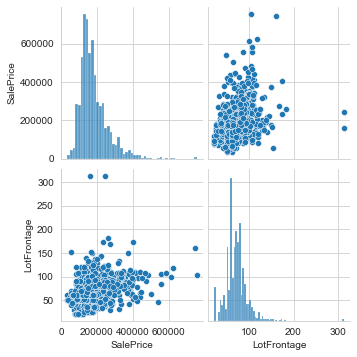

In [52]:
# Checking the importance of 'LotFrontage' column to that of saleprice

sns.pairplot(df_data[['SalePrice','LotFrontage']])

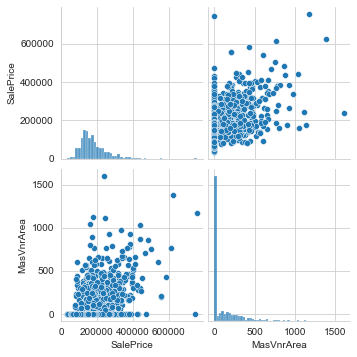

In [53]:
# Checking the importance of 'MasVnrArea' column to that of saleprice

sns.pairplot(df_data[['SalePrice','MasVnrArea']])

### Inferences:
    * From above, we can see that both LotFrontage and MasVnrArea has influence over saleprice, hence replacing missing values with mean

In [54]:
# Replacing missing values by mean value of respective column

df_data['LotFrontage'].fillna(df_data['LotFrontage'].mean(), inplace=True)
df_data['MasVnrArea'].fillna(df_data['MasVnrArea'].mean(), inplace=True)

In [55]:
# Rechecking columns having missing values

df_data.columns[df_data.isnull().any()].tolist()

[]

In [56]:
# Rechecking the shape of dataframe

df_data.shape

(1460, 76)

In [57]:
# Handling missing categorical columns

# MasVnrType
df_data.loc[pd.isnull(df_data["MasVnrType"]),"MasVnrType"] = df_data["MasVnrType"].mode().values

# BsmtExposure
df_data.loc[pd.isnull(df_data["BsmtExposure"]),"BsmtExposure"] = df_data["BsmtExposure"].mode().values

# BsmtFinType2
df_data.loc[pd.isnull(df_data["BsmtFinType2"]),"BsmtFinType2"] = df_data["BsmtFinType2"].mode().values

# Electrical
df_data.loc[pd.isnull(df_data["Electrical"]),"Electrical"] = df_data["Electrical"].mode().values

## Exploratory Data Analysis(EDA)

In [58]:
# Statistical Description of the data

df_data.describe()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,70.049958,10516.828082,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,22.024023,9981.264932,30.202904,20.645407,180.569112,456.098091,161.319273,441.866955,438.705324,386.587738,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,21.000000,1300.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,60.000000,7553.500000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,70.049958,9478.500000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,79.000000,11601.500000,2000.000000,2004.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,313.000000,215245.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


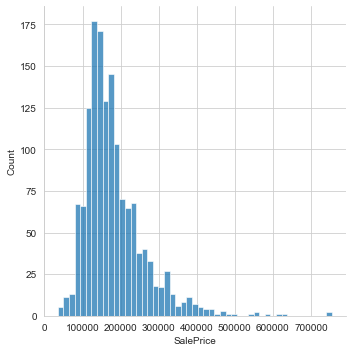

In [59]:
# Analysing target variable 'SalePrice'

sns.set_style('whitegrid')
sns.displot(df_data['SalePrice'])

In [60]:
# Check the skewness of the target variable

print("The skewness of the SalePrice:", df_data['SalePrice'].skew())

## Check the kurtosis of SalePrice

print("The kurtosis of the SalePrice:", df_data['SalePrice'].kurt())

The skewness of the SalePrice: 1.8828757597682129
The kurtosis of the SalePrice: 6.536281860064529


### Inferences:
    * Both skewness and kurtosis are greater than 1 which implies SalePrice is highly skewed

In [61]:
# Performing log transformation on SalePrice and rechecking the skewness

df_data['SalePrice'] = np.log(df_data['SalePrice'])

# Recheck the skewness of the target variable
print("The skewness of the target variable:", df_data['SalePrice'].skew())

## Recheck the kurtosis of target variable
print("The kurtosis of the target variable:", df_data['SalePrice'].kurt())

The skewness of the target variable: 0.12133506220520406
The kurtosis of the target variable: 0.8095319958036296


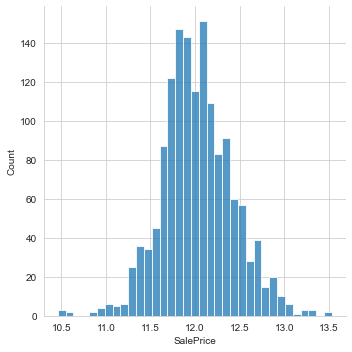

In [62]:
# Re-Analysing target variable 'SalePrice'

sns.set_style('whitegrid')
sns.displot(df_data['SalePrice'])

Now the target variable SalePrice is normally distributed

### Splitting the data into numeric and categorical to perform EDA

In [63]:
# Create numerical columns dataframe
df_num = df_data.select_dtypes(include=['int64', 'float64'])

# Create categorical columns dataframe
df_cat = df_data.select_dtypes(include='object')

In [64]:
print("Below are the list of",len(df_cat) ,"Categorical Columns are :\n")
print(df_cat,"\n")
print("Below are the list of",len(df_num) ,"Numerical Columns are :\n")
print(df_num)

Below are the list of 1460 Categorical Columns are :

     MSSubClass MSZoning Street LotShape LandContour Utilities LotConfig  \
0            60       RL   Pave      Reg         Lvl    AllPub    Inside   
1            20       RL   Pave      Reg         Lvl    AllPub       FR2   
2            60       RL   Pave      IR1         Lvl    AllPub    Inside   
3            70       RL   Pave      IR1         Lvl    AllPub    Corner   
4            60       RL   Pave      IR1         Lvl    AllPub       FR2   
...         ...      ...    ...      ...         ...       ...       ...   
1455         60       RL   Pave      Reg         Lvl    AllPub    Inside   
1456         20       RL   Pave      Reg         Lvl    AllPub    Inside   
1457         70       RL   Pave      Reg         Lvl    AllPub    Inside   
1458         20       RL   Pave      Reg         Lvl    AllPub    Inside   
1459         20       RL   Pave      Reg         Lvl    AllPub    Inside   

     LandSlope Neighborhood Condi

### Bivariate Analysis of the Continous columns

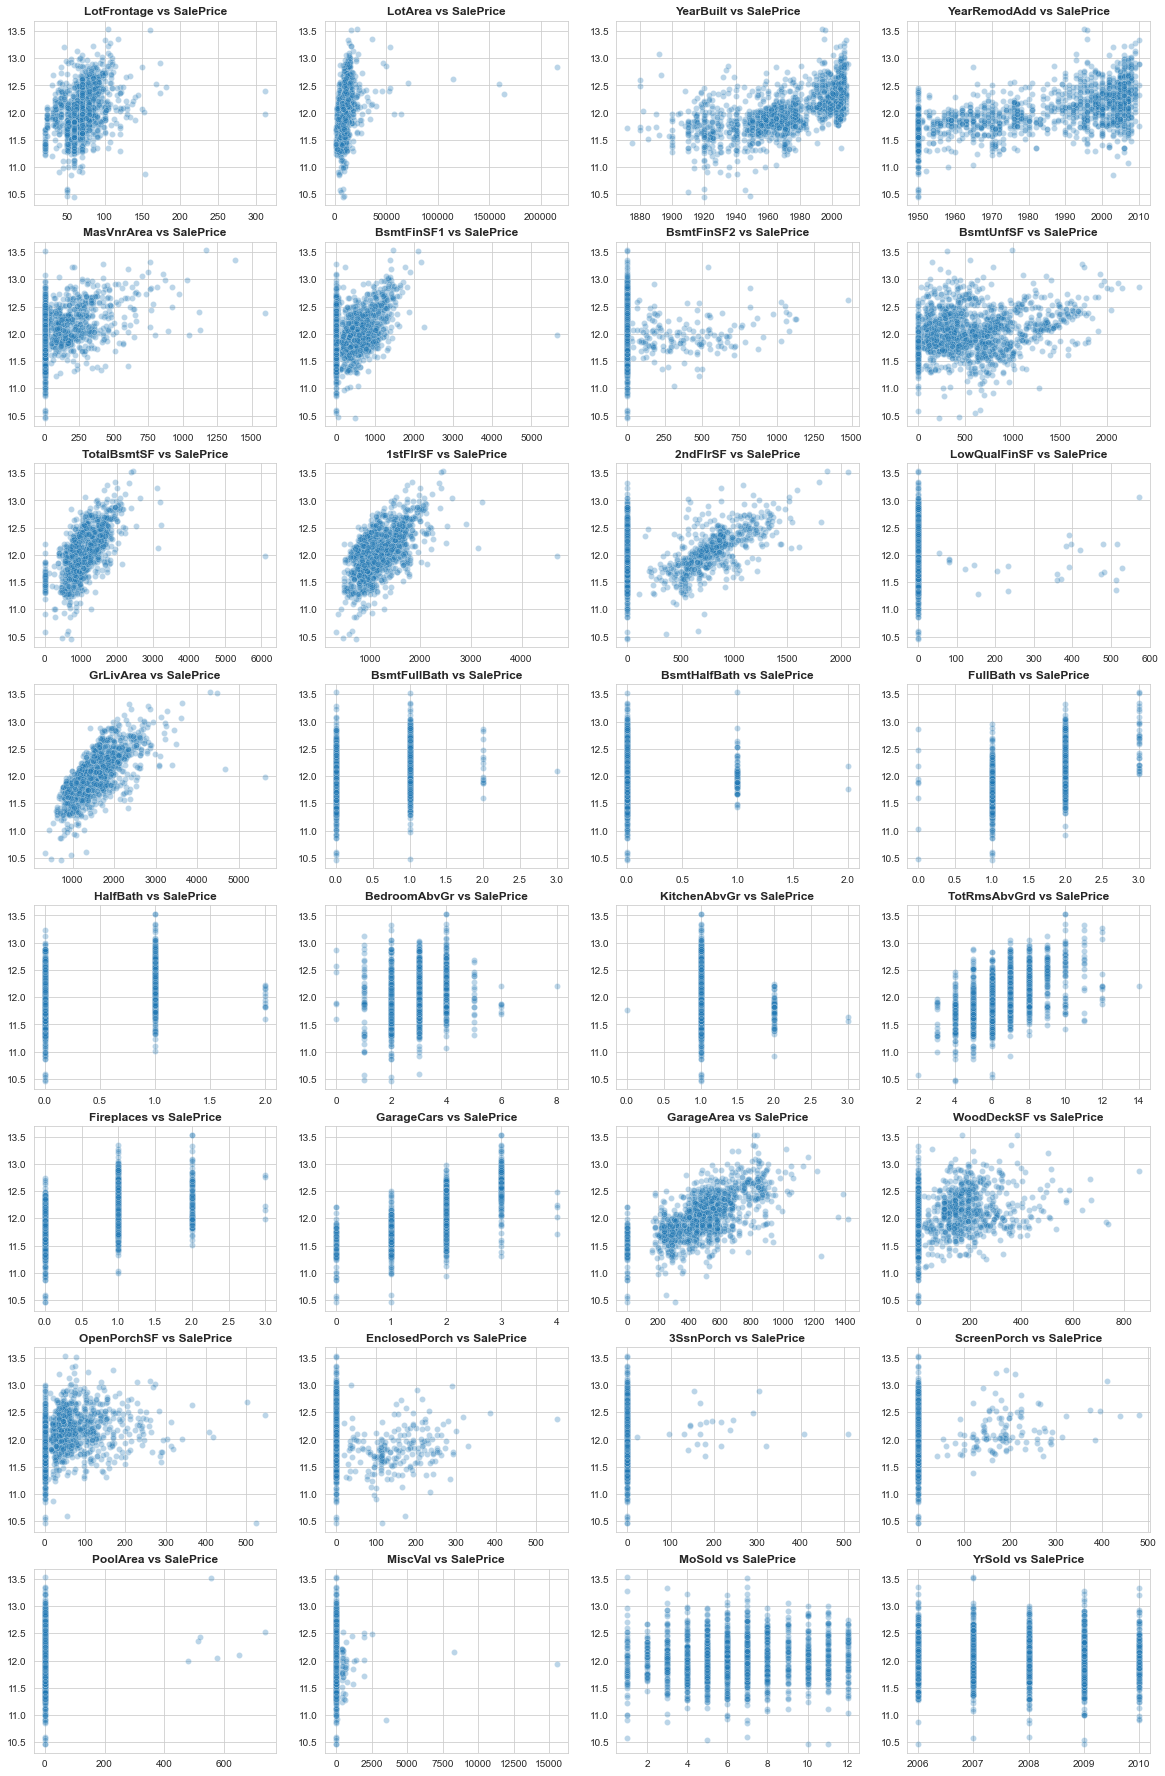

In [65]:
# Numerical columns data analysis

plt.figure(figsize=(20, 40))

count = 1
sale_price_column = 'SalePrice'

for column in df_num.columns:
    if column != sale_price_column:
        plt.subplot(10, 4, count)
        sns.scatterplot(df_data[column], df_data[sale_price_column], alpha = 0.3).set(ylabel=None, xlabel=None)
        plt.title(column + " vs " + sale_price_column, weight='bold')
        count += 1
    
plt.show()

### Bivariate Analysis of the Categorical columns

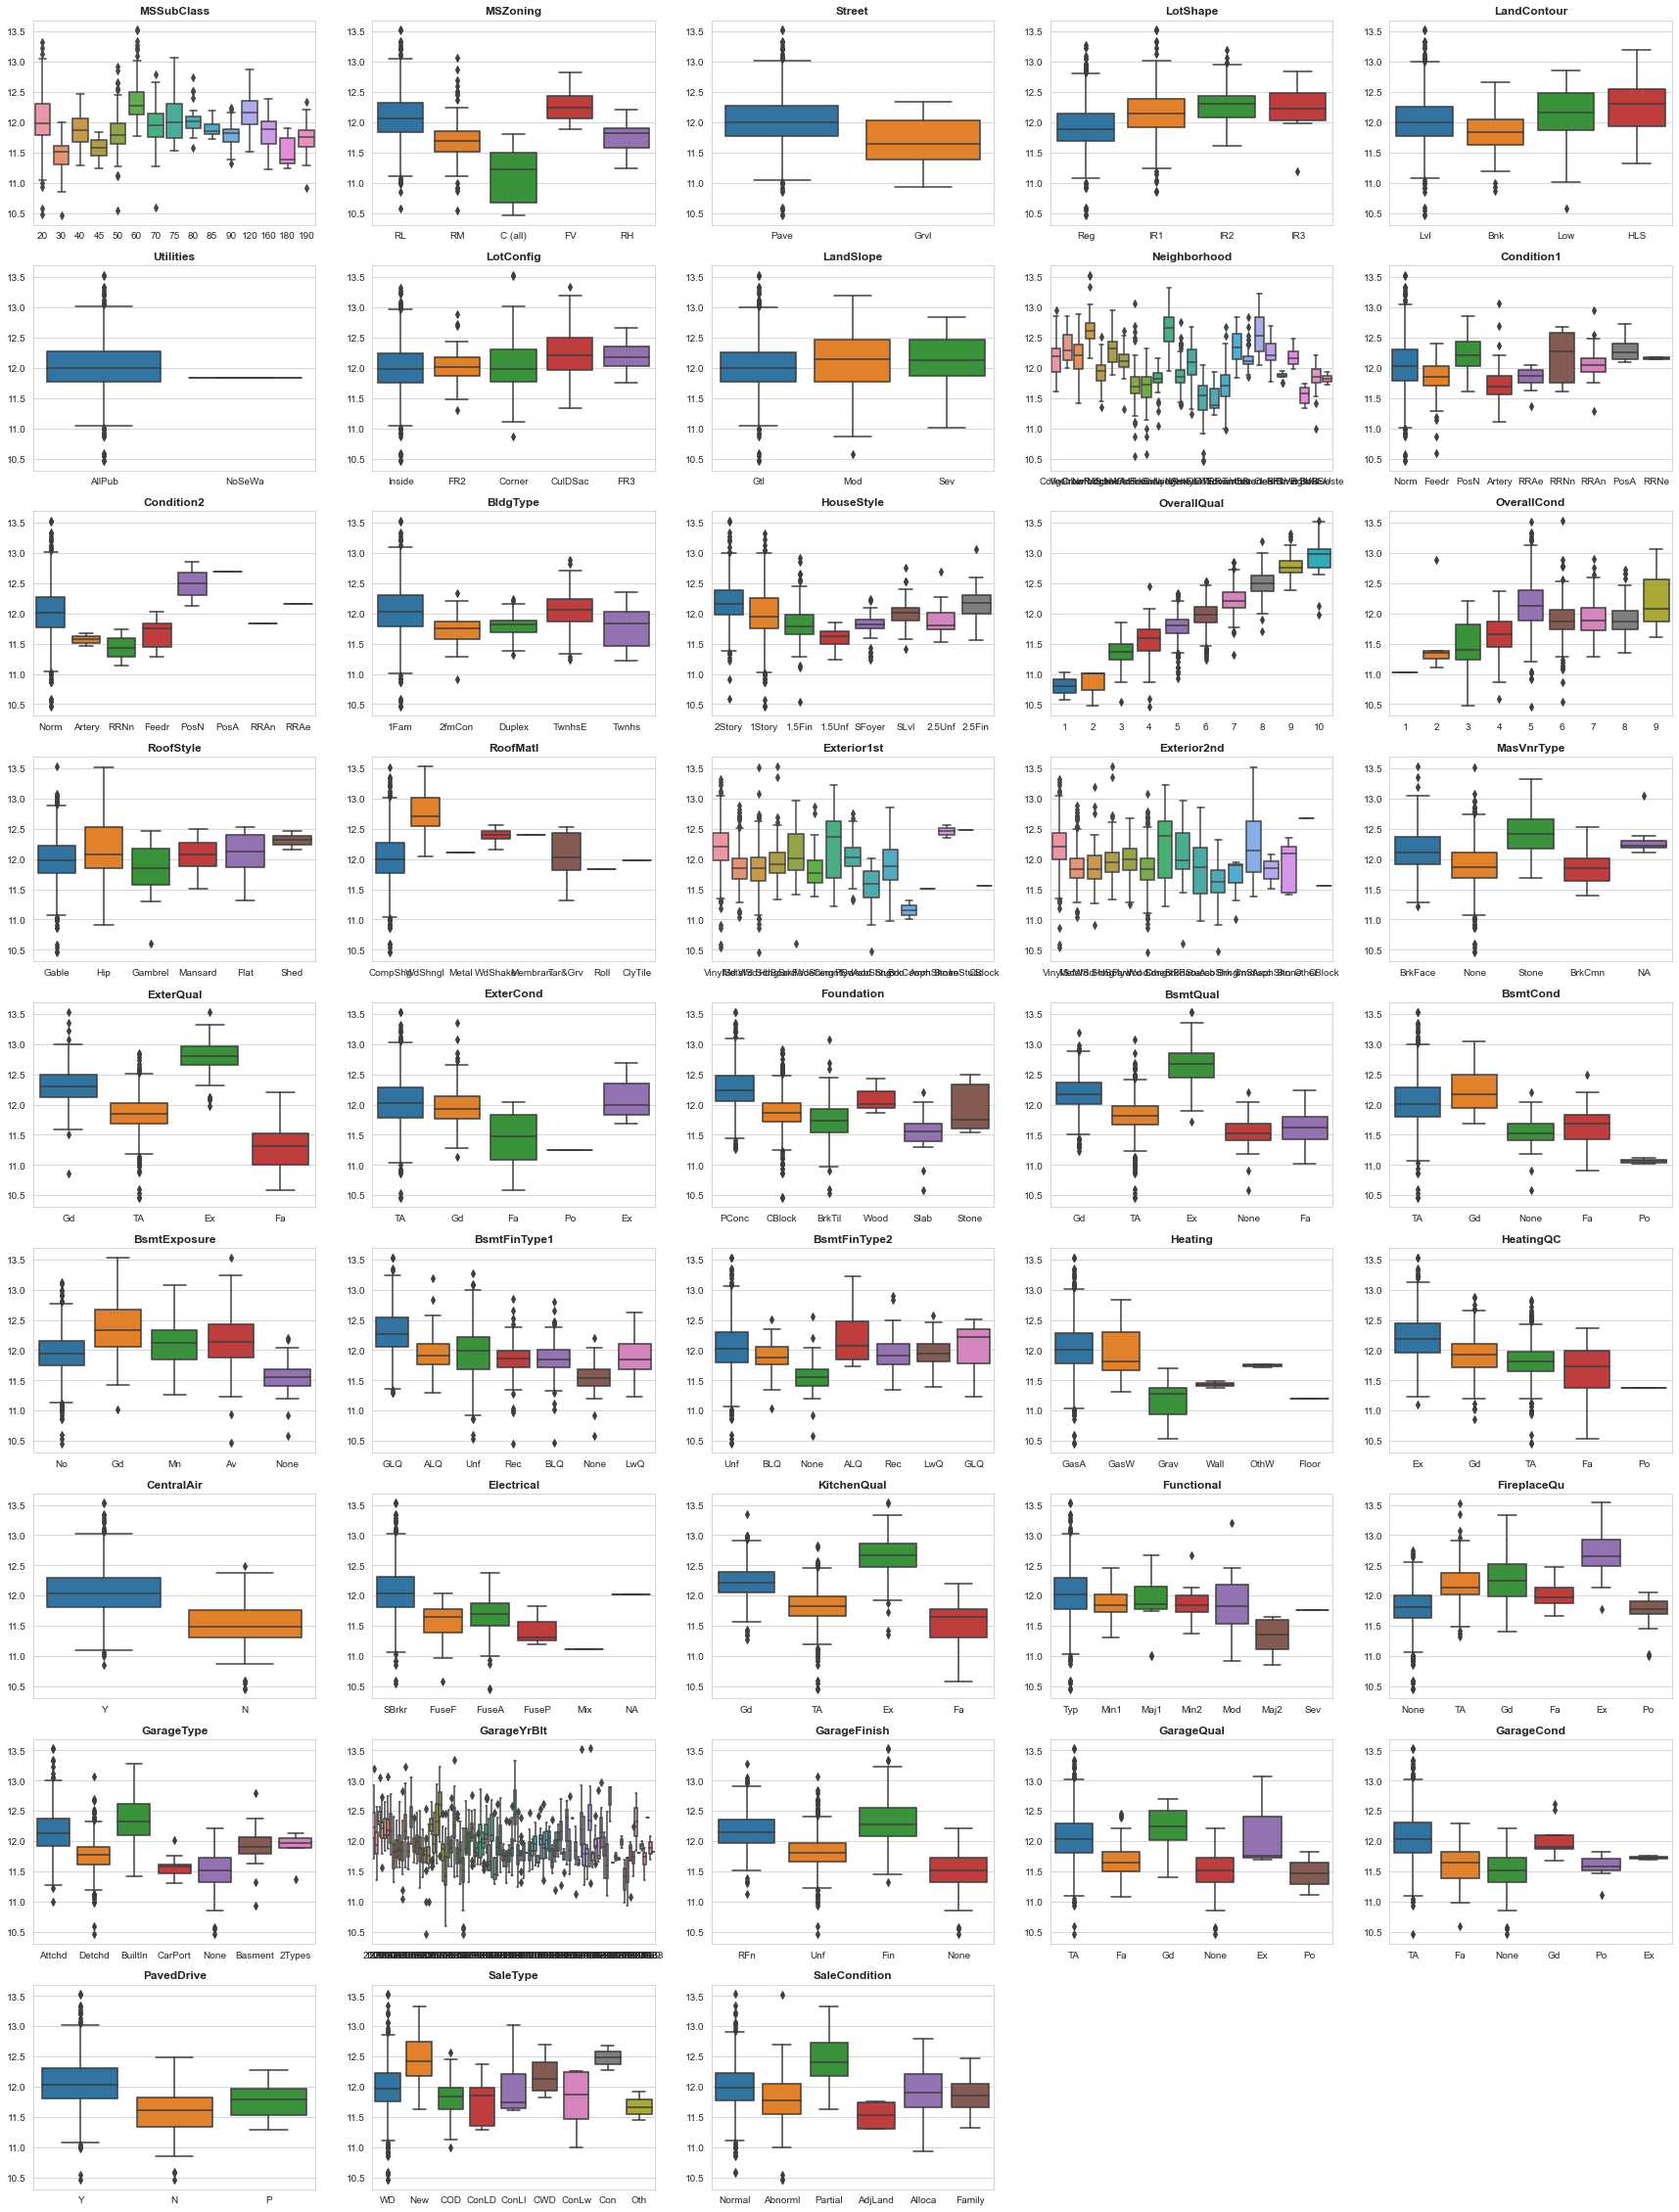

In [66]:
# Categorical columns data analysis

plt.figure(figsize=(30, 50))

count = 1
sale_price_column = 'SalePrice'

for column in df_cat.columns:
    if column != sale_price_column:
        plt.subplot(11, 5, count)
        sns.boxplot(x=df_data[column], y=df_data[sale_price_column]).set(ylabel=None, xlabel=None)
        plt.title(column, weight='bold')
        count += 1
    
plt.show()

### Multivariate Analysis of the all columns using Heat Map

<AxesSubplot:>

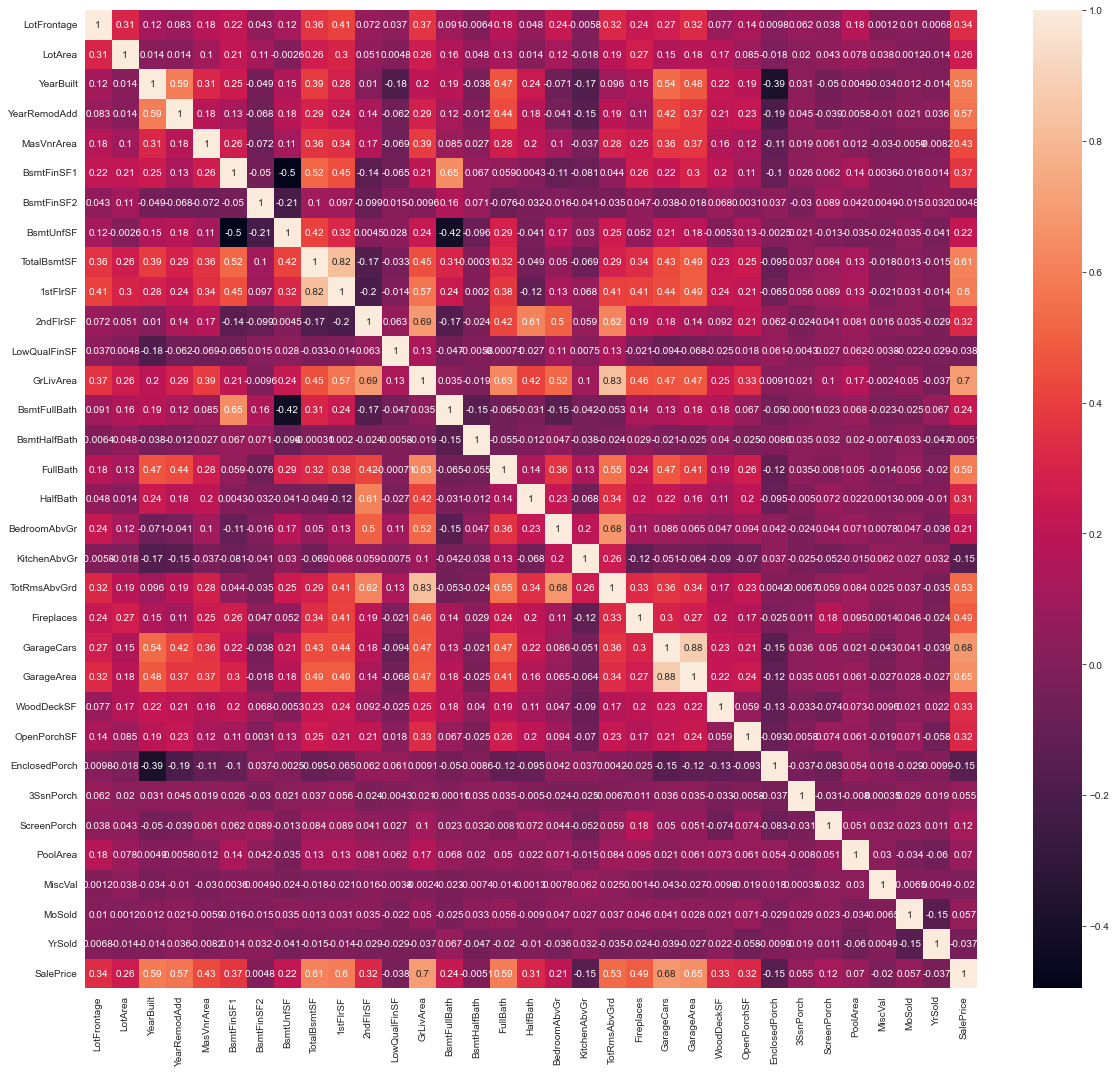

In [67]:
# Plotting Heatmap

plt.figure(figsize=(20, 18))
sns.heatmap(data=df_data.corr(), annot=True)

### Inferences:
From the above three graphs, we can infer that:

* There are considerable number of outliners which need to be treated.

* Multicolinearity exists, many columns are highly correlated with each other.

* Target variable SalesPrice is highly correlated with columns GrLiveArea, GarageCars & GarageArea.

* GarageArea and GarageCars have a strong correlation since both are describing the size.

* TotRmsAbvGrd and GrLivArea have a strong correlation

* GarageAge and TotalAge also have a strong correlation, could be because many garage had been build in the beginning itself

Since these pairs have high correlation , we have to drop any 1 during model preparation with the help of p-value and VIF

# 3. Data Preparation

In [68]:
# Identifying highly correlated varaibles

corr_matrix = df_data.corr().abs()
upper_set = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
col_to_drop = [col for col in upper_set.columns if any(upper_set[col] > 0.80)]
col_to_drop

['1stFlrSF', 'TotRmsAbvGrd', 'GarageArea']

In [69]:
# Dropping these three columns

df_data.drop(df_data[col_to_drop], axis=1, inplace = True)
df_data.shape

(1460, 73)

### Derived Feature

In [70]:
# Getting the age of the houses

df_data['CurrentYear'] = datetime.datetime.now().year
df_data["Age"] = df_data['CurrentYear'] - df_data['YearBuilt']
df_data.drop(['CurrentYear', 'YearBuilt'], axis = 1, inplace = True)

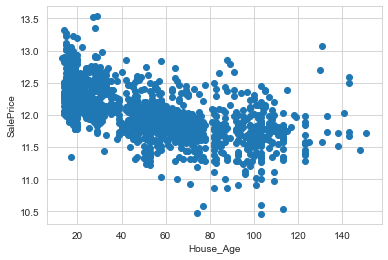

In [71]:
# Plotting newly derived field Age vs SalePrice

plt.scatter(x=df_data['Age'], y=df_data['SalePrice'])
plt.xlabel("House_Age"); plt.ylabel("SalePrice");

In [72]:
# Extract numerical columns

df_num = df_data.select_dtypes(include=['int64', 'float64'])

# Extract categorical columns

df_cat = df_data.select_dtypes(include='object')

### Creating dummy variables 

In [73]:
# Encoding categorical columns

df_cat_encoded = pd.get_dummies(df_cat, drop_first=True)
df_cat_encoded.head()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [74]:
# Checking shape

df_cat_encoded.shape

(1460, 340)

### Treating the Outliners for numerical variables

<AxesSubplot:>

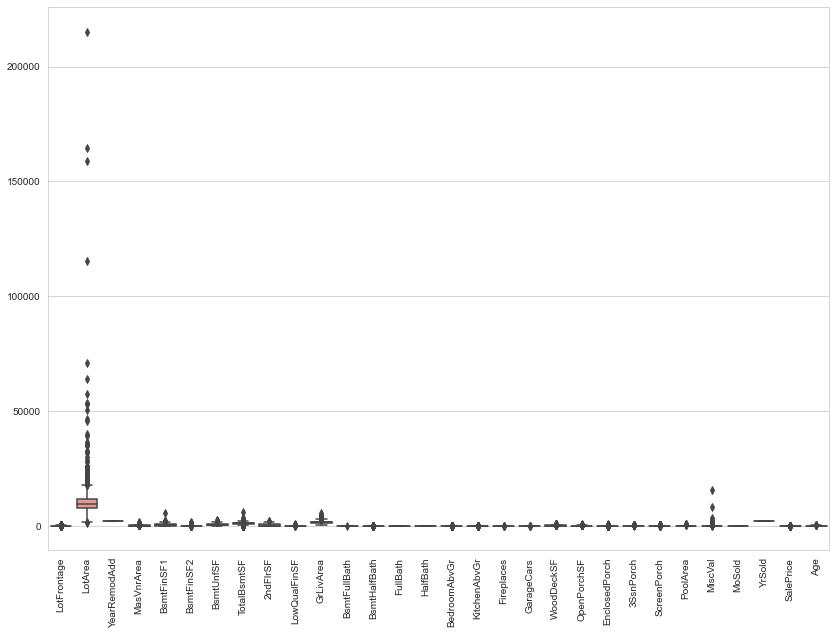

In [75]:
# Checking outlier in numerical variables using boxplot

plt.figure(figsize=[14,10])
plt.xticks(rotation=90)
sns.boxplot(data=df_num)

### Inferences:
    We can clearly see there are outliners for multiple variables
    Now, lets treat those using 5% and 95%

In [76]:
# Restricting outliers to 5% at lower bound and 95% at upper bound

for col in df_num.columns:
    df_num[col][df_num[col] <= df_num[col].quantile(0.05)] = df_num[col].quantile(0.05)
    df_num[col][df_num[col] >= df_num[col].quantile(0.95)] = df_num[col].quantile(0.95)

<AxesSubplot:>

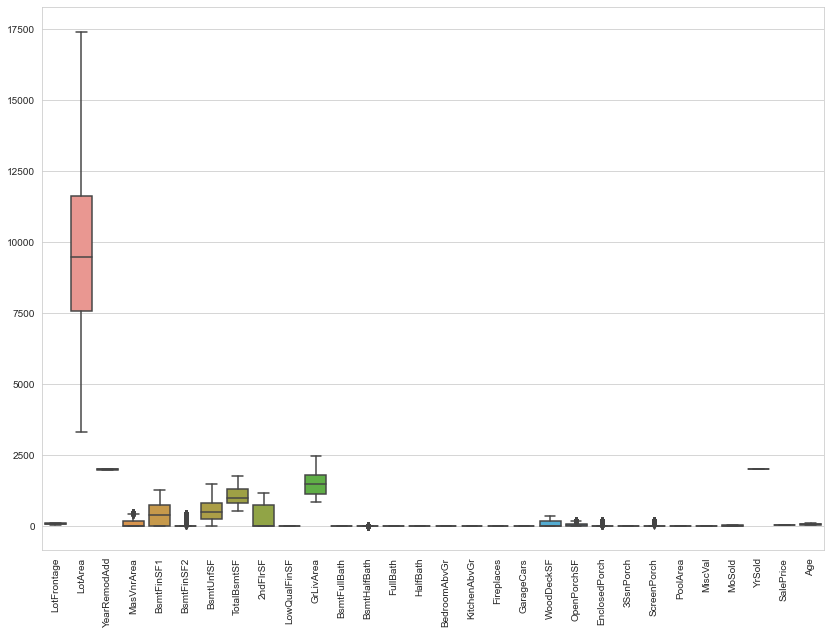

In [77]:
# Analysing outliers in numerical columns using boxplot post treatment

plt.figure(figsize=[14,10])
plt.xticks(rotation=90)
sns.boxplot(data=df_num)

### Dataframe is now free from outliners and cleansed

In [78]:
# Concatenate numerical columns with encoded categorical columns
df = pd.concat([df_num, df_cat_encoded], axis=1)


# View the first few rows of our dataframe
df.head()

,LotFrontage,LotArea,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,LowQualFinSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450.0,2003,196.0,706,0.0,150,856.0,854.0,0,...,0,0,0,0,1,0,0,0,1,0
1,80.0,9600.0,1976,0.0,978,0.0,284,1262.0,0.0,0,...,0,0,0,0,1,0,0,0,1,0
2,68.0,11250.0,2002,162.0,486,0.0,434,920.0,866.0,0,...,0,0,0,0,1,0,0,0,1,0
3,60.0,9550.0,1970,0.0,216,0.0,540,756.0,756.0,0,...,0,0,0,0,1,0,0,0,0,0
4,84.0,14260.0,2000,350.0,655,0.0,490,1145.0,1053.0,0,...,0,0,0,0,1,0,0,0,1,0


In [79]:
df.shape

(1460, 370)

# 4. Building the model 

In [80]:
# Dividing dataframe into Independent & Dependent Variables

X = df.drop("SalePrice", 1).copy()
X.head()

,LotFrontage,LotArea,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,LowQualFinSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450.0,2003,196.0,706,0.0,150,856.0,854.0,0,...,0,0,0,0,1,0,0,0,1,0
1,80.0,9600.0,1976,0.0,978,0.0,284,1262.0,0.0,0,...,0,0,0,0,1,0,0,0,1,0
2,68.0,11250.0,2002,162.0,486,0.0,434,920.0,866.0,0,...,0,0,0,0,1,0,0,0,1,0
3,60.0,9550.0,1970,0.0,216,0.0,540,756.0,756.0,0,...,0,0,0,0,1,0,0,0,0,0
4,84.0,14260.0,2000,350.0,655,0.0,490,1145.0,1053.0,0,...,0,0,0,0,1,0,0,0,1,0


In [81]:
# y contains target variable

y = df['SalePrice'].copy()
y.head()

0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: SalePrice, dtype: float64

In [82]:
# Splitting X & y into train and test data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [83]:
# Checking the shapes

print("X train shape is:{0}, y train shape is:{1}".format(X_train.shape, y_train.shape))
print("X test shape is:{0}, y test shape is:{1}".format(X_test.shape, y_test.shape))

X train shape is:(1168, 369), y train shape is:(1168,)
X test shape is:(292, 369), y test shape is:(292,)


### Rescaling the numerical variables

In [84]:
# Creating a list of numerical variables to be scaled

num_cols = list(X_train.select_dtypes(include=['int64', 'float64']).columns)

# Printing the numerical variables
print(num_cols)

['LotFrontage', 'LotArea', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageCars', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'Age']


In [86]:
# Instantiate the object

scaler = StandardScaler()


## Scale the numerical variables 

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

### Creating function to derive metrics

In [89]:
# Defining a function to derive metrics

def display_metrics(y_train, y_train_pred, y_test, y_pred):
       
    ## Create a list to save all metrics, helpful in creating final summary
    metric = []
    
    ## R-squared of train and test data
    print("R-Squared for train set =", '%.2f' % r2_score(y_train, y_train_pred))
    metric.append(r2_score(y_train, y_train_pred))
    print("R-Squared for test set =", '%.2f' % r2_score(y_test, y_pred))
    metric.append(r2_score(y_test, y_pred))
    
    ## Residual sum of squares of train and test data
    rss_train = np.sum(np.square(y_train - y_train_pred))
    metric.append(rss_train)
    rss_test = np.sum(np.square(y_test - y_pred))
    metric.append(rss_test)
    print("RSS for train set =", '%.2f' % rss_train)
    print("RSS for test set =", '%.2f' % rss_test)
    
    ## Mean Squared Error of train and test data
    mse_train = mean_squared_error(y_train, y_train_pred)
    metric.append(mse_train)
    mse_test = mean_squared_error(y_test, y_pred)
    metric.append(mse_test)
    print("MSE for train set =", '%.2f' % mse_train)
    print("MSE for test set =", '%.2f' % mse_test)
    
    # Root Mean Squared Error for train and test data
    rmse_train = mse_train**0.5
    metric.append(rmse_train)
    rmse_test = mse_test**0.5
    metric.append(rmse_test)
    print("RMSE for train set =", '%.2f' % rmse_train) 
    print("RMSE for test set =", '%.2f' % rmse_test) 
    

    return metric

In [90]:
# Running a cross validation on a list of alphas to find the optimum value of alpha

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                    2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}

# 5. Model Prediction and Evaluation 

## Model1: Ridge Regression

In [91]:
# Creating a Ridge Regression model

ridge = Ridge()

# cross validation

ridgeCV = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1, n_jobs=-1)            
ridgeCV.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [92]:
# Viewing CV results

cv_results = pd.DataFrame(ridgeCV.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.907385,0.440205,0.017932,0.001154,0.0001,{'alpha': 0.0001},-0.080407,-0.100137,-0.098764,-0.094569,...,-0.092231,0.007416,26,-0.051283,-0.047822,-0.050261,-0.049338,-0.051487,-0.050038,0.001349
1,0.046859,0.000013,0.009371,0.007652,0.001,{'alpha': 0.001},-0.080307,-0.099314,-0.097155,-0.094347,...,-0.091369,0.007207,25,-0.051314,-0.047859,-0.050353,-0.049353,-0.051568,-0.050089,0.001362
2,0.040616,0.007653,0.012497,0.006249,0.01,{'alpha': 0.01},-0.079172,-0.096498,-0.095929,-0.092661,...,-0.089407,0.007101,24,-0.051524,-0.048116,-0.050570,-0.049488,-0.052013,-0.050342,0.001409
3,0.043741,0.006247,0.009376,0.007655,0.05,{'alpha': 0.05},-0.077653,-0.093328,-0.093807,-0.089956,...,-0.087096,0.006658,23,-0.052182,-0.048714,-0.050921,-0.049969,-0.052761,-0.050909,0.001467
4,0.041194,0.008187,0.011171,0.006150,0.1,{'alpha': 0.1},-0.076699,-0.091524,-0.091998,-0.088872,...,-0.085683,0.006408,22,-0.052729,-0.049248,-0.051183,-0.050399,-0.053344,-0.051381,0.001498
5,0.046979,0.004866,0.007845,0.006987,0.2,{'alpha': 0.2},-0.075136,-0.089399,-0.089663,-0.087692,...,-0.083889,0.006243,21,-0.053414,-0.050017,-0.051548,-0.050981,-0.054047,-0.052001,0.001508
6,0.043748,0.006254,0.006247,0.007651,0.3,{'alpha': 0.3},-0.074040,-0.087986,-0.088093,-0.087369,...,-0.082782,0.006216,20,-0.053845,-0.050568,-0.051820,-0.051376,-0.054488,-0.052419,0.001496
7,0.037494,0.007652,0.006247,0.007651,0.4,{'alpha': 0.4},-0.073224,-0.086935,-0.086995,-0.087108,...,-0.081961,0.006231,18,-0.054157,-0.050999,-0.052044,-0.051675,-0.054810,-0.052737,0.001479
8,0.043740,0.006251,0.006247,0.007651,0.5,{'alpha': 0.5},-0.072591,-0.086112,-0.086081,-0.086800,...,-0.081290,0.006221,17,-0.054403,-0.051335,-0.052237,-0.051928,-0.055069,-0.052994,0.001466
9,0.034362,0.006234,0.012488,0.006244,0.6,{'alpha': 0.6},-0.072021,-0.085434,-0.085301,-0.086478,...,-0.080708,0.006215,16,-0.054616,-0.051604,-0.052407,-0.052138,-0.055290,-0.053211,0.001461


In [93]:
# Check the optimal value of alpha

ridgeCV.best_params_

{'alpha': 9.0}

In [94]:
# Create a ridge regreesion instance with optimum value alpha=9

ridge = Ridge(alpha=9)

# Fit the model on training data

ridge.fit(X_train, y_train)

Ridge(alpha=9)

In [95]:
## Making predictions

y_train_pred = ridge.predict(X_train)
y_pred = ridge.predict(X_test)

In [96]:
## Checking metrics

ridge_metrics = display_metrics(y_train, y_train_pred, y_test, y_pred)

R-Squared for train set = 0.94
R-Squared for test set = 0.93
RSS for train set = 8.54
RSS for test set = 2.85
MSE for train set = 0.01
MSE for test set = 0.01
RMSE for train set = 0.09
RMSE for test set = 0.10


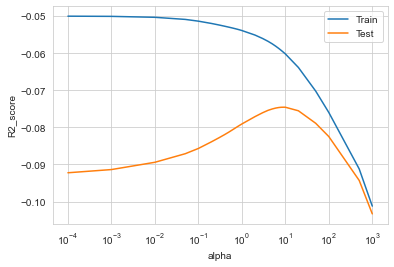

In [97]:
## Plotting R2 score vs alpha values

plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'], label='Train')
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'], label='Test')
plt.xlabel('alpha')
plt.ylabel('R2_score')
plt.xscale('log')
plt.legend()
plt.show()

### Inferences:
* Optimum value of alpha taken is 9 and built a ridge regression model using this value.

* R2 Scores for both train and test set been fetched

* From graph, we can see the optimal value of alpha is 9.

* As the value of alpha increases, there is a decrease in train error and an initial increase followed by decrease in test error.

## Model2: Lasso Regression 

In [98]:
# Creating a Lasso model

lasso = Lasso()

# Cross validation

lassoCV = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1, n_jobs=-1)            
lassoCV.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [99]:
# Checking CV results

lasso_cv_results = pd.DataFrame(lassoCV.cv_results_)
lasso_cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.770055,0.246806,0.009195,0.007515,0.0001,{'alpha': 0.0001},-0.068958,-0.083988,-0.081546,-0.083876,...,-0.078227,0.006195,2,-0.056938,-0.053971,-0.054356,-0.054298,-0.057185,-0.055350,0.001406
1,0.117649,0.049617,0.011164,0.006146,0.001,{'alpha': 0.001},-0.069413,-0.082619,-0.078775,-0.080491,...,-0.076386,0.005351,1,-0.071671,-0.067229,-0.068595,-0.068963,-0.070466,-0.069385,0.001539
2,0.046538,0.012978,0.014799,0.005334,0.01,{'alpha': 0.01},-0.092530,-0.111273,-0.102132,-0.104683,...,-0.100203,0.007764,3,-0.099143,-0.095590,-0.097735,-0.097495,-0.099980,-0.097989,0.001507
3,0.039942,0.006716,0.006628,0.005568,0.05,{'alpha': 0.05},-0.109872,-0.133083,-0.129835,-0.127894,...,-0.122758,0.009406,4,-0.123030,-0.118643,-0.121925,-0.121029,-0.123374,-0.121600,0.001695
4,0.031644,0.008552,0.004440,0.006145,0.1,{'alpha': 0.1},-0.144667,-0.167955,-0.180433,-0.164985,...,-0.161765,0.012728,5,-0.164420,-0.157604,-0.160549,-0.159768,-0.161369,-0.160742,0.002225
5,0.028119,0.006247,0.012497,0.006249,0.2,{'alpha': 0.2},-0.239648,-0.251524,-0.277194,-0.255624,...,-0.251451,0.015167,6,-0.256051,-0.249270,-0.250132,-0.247912,-0.251069,-0.250887,0.002783
6,0.031237,0.000007,0.012501,0.006250,0.3,{'alpha': 0.3},-0.274800,-0.286080,-0.307810,-0.291118,...,-0.285722,0.013585,7,-0.287961,-0.284876,-0.280175,-0.284060,-0.289363,-0.285287,0.003211
7,0.034899,0.003846,0.009400,0.005850,0.4,{'alpha': 0.4},-0.274800,-0.286080,-0.307810,-0.291118,...,-0.285722,0.013585,7,-0.287961,-0.284876,-0.280175,-0.284060,-0.289363,-0.285287,0.003211
8,0.032974,0.002675,0.009155,0.000712,0.5,{'alpha': 0.5},-0.274800,-0.286080,-0.307810,-0.291118,...,-0.285722,0.013585,7,-0.287961,-0.284876,-0.280175,-0.284060,-0.289363,-0.285287,0.003211
9,0.029636,0.006916,0.005752,0.006336,0.6,{'alpha': 0.6},-0.274800,-0.286080,-0.307810,-0.291118,...,-0.285722,0.013585,7,-0.287961,-0.284876,-0.280175,-0.284060,-0.289363,-0.285287,0.003211


In [100]:
# Checking the optimal value of alpha

lassoCV.best_params_

{'alpha': 0.001}

In [103]:
# Creating a lasso regreesion instance with optimum value alpha=0.001

lasso = Lasso(alpha=0.001)

# Fitting the model on training data

lasso.fit(X_train, y_train)

Lasso(alpha=0.001)

In [104]:
# Making predictions

y_train_pred = lasso.predict(X_train)
y_pred = lasso.predict(X_test)

# Checking metrics

lasso_metrics = display_metrics(y_train, y_train_pred, y_test, y_pred)

R-Squared for train set = 0.92
R-Squared for test set = 0.93
RSS for train set = 11.35
RSS for test set = 2.92
MSE for train set = 0.01
MSE for test set = 0.01
RMSE for train set = 0.10
RMSE for test set = 0.10


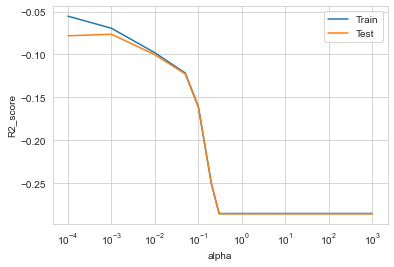

In [105]:
## Plotting R2 score vs alpha values

plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_train_score'], label='Train')
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_test_score'], label='Test')
plt.xlabel('alpha')
plt.ylabel('R2_score')
plt.xscale('log')
plt.legend()
plt.show()

### Inferences:

* Optimum value of alpha taken is 0.001 and built a lasso regression model using this value.
* R2 Scores for both train and test set were determined
* As the value of alpha increases, there is a decrease in both train and test error.
* We can infer that after a error value of approximately 0.05, error remains constant.

# 6. Models comparison 

## Ridge Vs Lasso model comparison

In [106]:
# Creating a table which contain all the metrics

lr_table = {
    'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)', 'MSE (Train)','MSE (Test)', 'RMSE (Train)', 'RMSE (Test)'],
            'Ridge Regression' : ridge_metrics,
            'Lasso Regression' : lasso_metrics
        }

final_metric = pd.DataFrame(lr_table, columns = ['Metric', 'Ridge Regression', 'Lasso Regression'] )
final_metric.set_index('Metric')

,Ridge Regression,Lasso Regression
Metric,,
R2 Score (Train),0.940015,0.920280
R2 Score (Test),0.927004,0.925048
RSS (Train),8.539168,11.348530
RSS (Test),2.847327,2.923659
MSE (Train),0.007311,0.009716
MSE (Test),0.009751,0.010013
RMSE (Train),0.085504,0.098571
RMSE (Test),0.098748,0.100063


In [107]:
# Viewing coefficients after regularization

betas = pd.DataFrame(index=X.columns)
betas.rows = X.columns

# Viewing ridge coefficients and one for lasso coefficients

betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [108]:
# View the top 10 coefficients of Ridge regression in descending order

betas['Ridge'].sort_values(ascending=False)[:10]

# To interpret the ridge coefficients in terms of target, we have to take inverse log (i.e. e to the power) of betas

ridge_coeffs = np.exp(betas['Ridge'])
ridge_coeffs.sort_values(ascending=False)[:10]

GrLivArea               1.101074
OverallQual_9           1.087024
OverallQual_8           1.083619
OverallCond_9           1.081866
Neighborhood_Crawfor    1.077129
Exterior1st_BrkFace     1.071995
Functional_Typ          1.069252
SaleCondition_Alloca    1.066891
TotalBsmtSF             1.057798
CentralAir_Y            1.055317
Name: Ridge, dtype: float64

In [109]:
# View the top 10 coefficients of Lasso in descending order

betas['Lasso'].sort_values(ascending=False)[:10]

# To interpret the lasso coefficients in terms of target, we have to take inverse log (i.e. 10 to the power) of betas

lasso_coeffs = np.exp(betas['Lasso'])
lasso_coeffs.sort_values(ascending=False)[:10]

OverallQual_9           1.128808
GrLivArea               1.114124
OverallQual_8           1.110440
Neighborhood_Crawfor    1.086293
Functional_Typ          1.077802
Exterior1st_BrkFace     1.076527
Neighborhood_Somerst    1.048616
CentralAir_Y            1.048238
TotalBsmtSF             1.045135
OverallCond_9           1.039292
Name: Lasso, dtype: float64

# 7. Conclusion 

### Top 5 variables that are significant as well as how those variables describe the price of a house:

1. GrLivArea: an increase of 1 square foot of house area above ground, the price will increase by approx 1.10 times.

2. Neighborhood_Crawfor: if Crawford is a nearby location, then the price of house will increase by approx 1.09 times.

3. OverallQual_8: if the overall material and finish of the house is Very Good, the price of house will increase by approx 1.08 times.

4. Functional_Typ: if the home functionality is typical, then the price of house will increase by approx 1.07 times.

5. Exterior1st_BrkFace: if the exterior covering on the house is Brick Face, the price of house will increase by approx 1.07 times.

### Optimal vallues of lambda:

6. Optimum value for lambda in ridge regression is 9

7. Optimum value for lambda in lasso regression is 0.001